In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.formula.api as smf

In [3]:
## 8. This question involves the use of simple linear regression on the Auto  data set.
### (a) Use the lm() function to perform a simple linear regression with  mpg as the response and 
# horsepower as the predictor. Use the  summary() function to print the results.

auto = pd.read_csv('/home/abhishek/Desktop/ISLR-Applied-Exercises-in-Python/data/Auto.csv')
print(auto.shape)

auto.head()

(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [5]:
# horsepower is of type object, it needs to be int/float for a regression fit

auto['horsepower'] = auto['horsepower'].replace('?', np.nan)
auto.dropna(inplace=True)

In [6]:
auto['horsepower'] = auto['horsepower'].astype(np.float32)

In [7]:
result = smf.ols('mpg ~ horsepower',data = auto).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           7.03e-81
Time:                        10:09:35   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [8]:
# i. Is there a relationship between the predictor and the response?

# Since there is a non-negative coefficient, there is a relationship between predictor and response

In [9]:
# ii. How strong is the relationship between the predictor and the response?

# we can measure the overall fit by R^2 value, since R^2 value s 0.60, we can say that 60% of the variablity
# is explained by the predictor

In [10]:
# iii. Is the relationship between the predictor and the response positive or negative?

# the value of the coefficient is -0.1578, hence the relationship is negative.

In [11]:
# (iv) What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals ?

lin_reg = LinearRegression().fit(auto['horsepower'].to_frame(), auto['mpg'])
lin_reg.predict(pd.Series([98]).to_frame())


array([24.4670769])

In [12]:
def get_prediction_intervals(prediction, y_test, test_predictions, pi=.95):
    '''
    Get prediction intervals for linear regression
    '''
    
    # get standard deviation of y_test
    sum_errs = np.sum((y_test - test_predictions)**2)
    stddev = np.sqrt(1 / (len(y_test) - 2) * sum_errs )
    
    # get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stddev
    
    # generate prediction interval lower and upper bound
    lower, upper = prediction-interval, prediction+interval
    
    return lower, prediction, upper

In [13]:
# (b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.


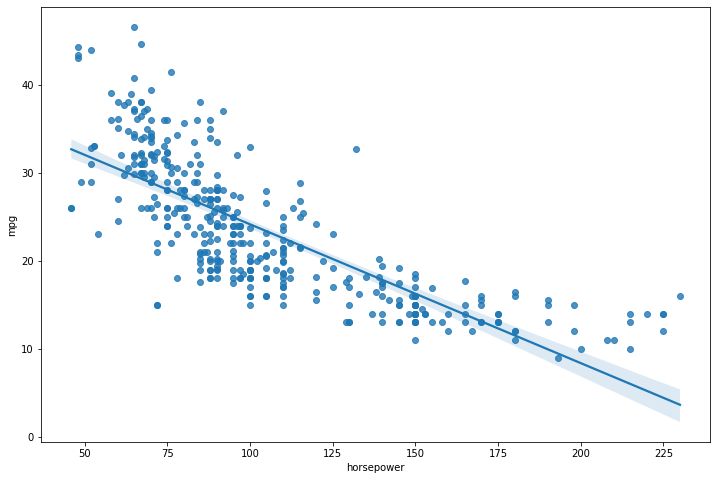

In [14]:
plt.figure(figsize = (12,8))
sns.regplot(auto['horsepower'], auto['mpg'])


In [15]:
# (c) Use the plot() function to produce diagnostic plots of the least squares regression fit. 
# Comment on any problems you see with the fit.

import statsmodels.graphics.api as smg

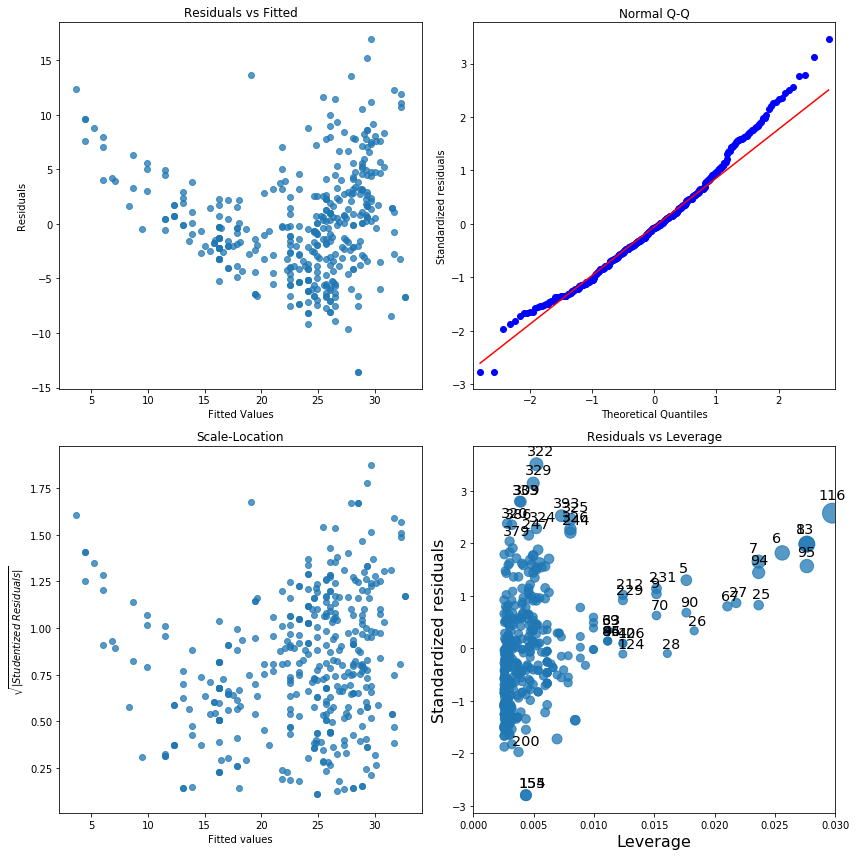

In [16]:
# You ran a linear regression analysis and the stats software spit out a bunch of numbers. 
# The results were significant (or not). You might think that you’re done with analysis. 
# No, not yet. After running a regression analysis, you should check if the model works well for data.

# We can check if a model works well for data in many different ways. 
# We pay great attention to regression results, such as slope coefficients, p-values, or R2 that 
# tell us how well a model represents given data. That’s not the whole picture though. Residuals 
# could show how poorly a model represents data. Residuals are leftover of the outcome variable after 
# fitting a model (predictors) to data and they could reveal unexplained patterns in the data by the 
# fitted model. Using this information, not only could you check if linear regression assumptions are 
# met, but you could improve your model in an exploratory way.

# The diagnostic plots show residuals in four different ways.
# 1. Residuals vs Fitted
# 2. Normal Q-Q
# 3. Scale-Location
# 4. Residuals vs Leverage

# Diagnostic plots
infl = result.get_influence()
fig, ax = plt.subplots(2, 2, figsize = (12, 12))

# 1. Residuals vs fitted values
ax1 = plt.subplot(221)
plt.scatter(result.fittedvalues, result.resid, alpha=0.75)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# 2. Normal Q-Q plot
ax2 = plt.subplot(222)
smg.qqplot(infl.resid_studentized_internal, line='q', ax=ax2)
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized residuals')

# 3. Square root absolute standardized residuals vs fitted values
ax3 = plt.subplot(223)
plt.scatter(result.fittedvalues, np.sqrt(np.absolute(infl.resid_studentized_external)), alpha = 0.75)
plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel(r'$\sqrt{|Studentized\ Residuals|}$')

# 4. Standardized residuals vs Leverage residuals
ax4 = plt.subplot(224)
smg.influence_plot(result, size=20, ax=ax4)
plt.xlim(0, 0.03)
plt.xlabel('Leverage')
plt.ylabel('Standardized residuals')
plt.title('Residuals vs Leverage')

plt.tight_layout()
plt.show()

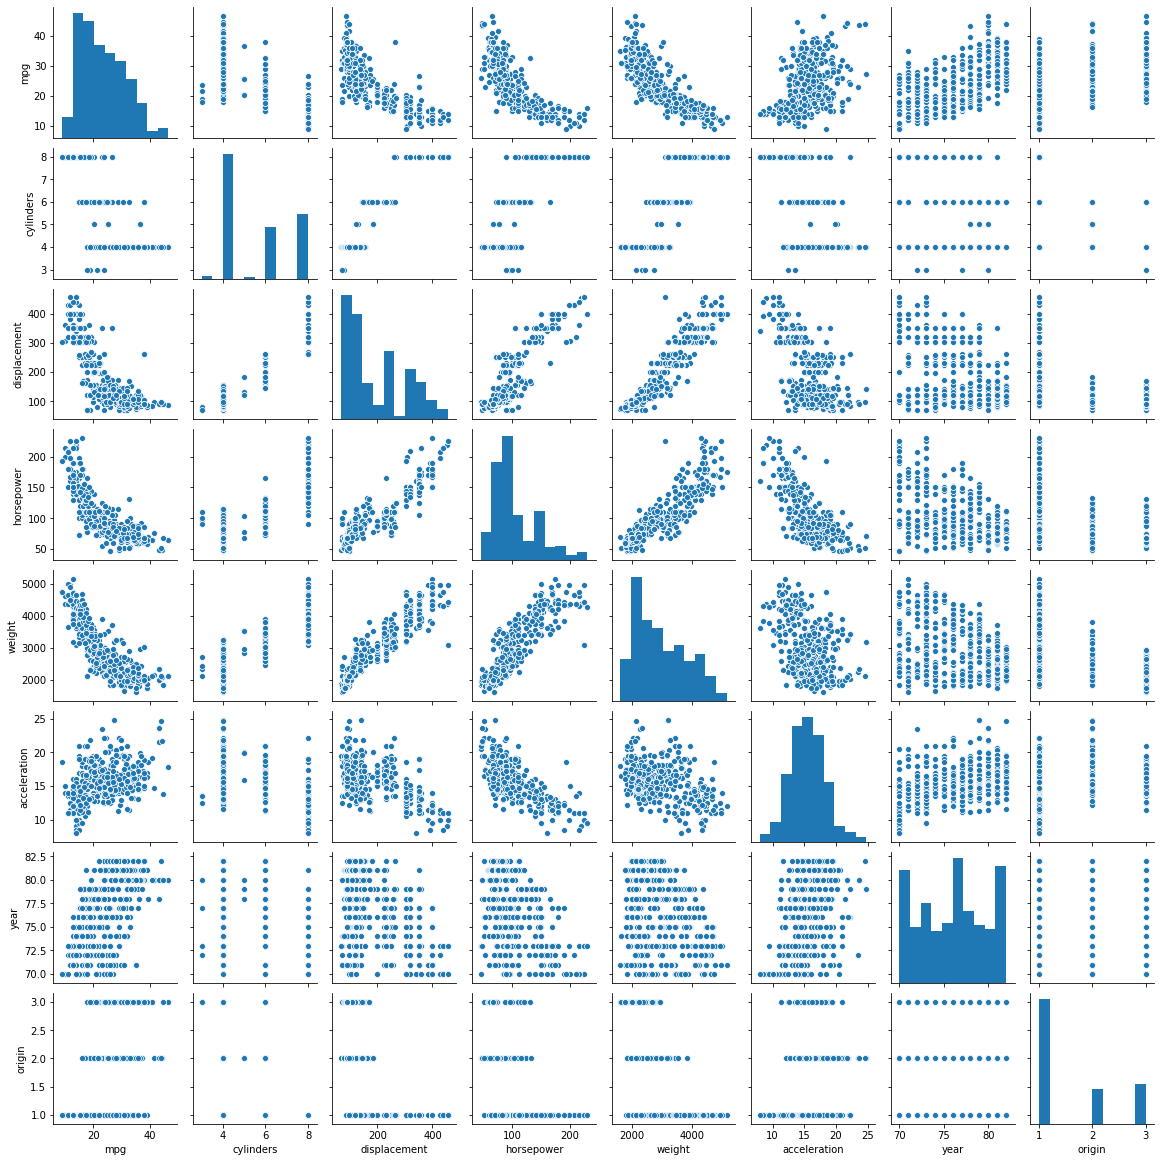

In [18]:
# 9. This question involves the use of multiple linear regression on the Auto Dataset

# (a). Produce a scatterplot matrix which includes all of the variables in the dataset

sns.pairplot(auto, height = 2)

In [20]:
# (b) Compute the matrix of correlations between the variables using the function cor(). 
# You will need to exclude the name variable, cor() which is qualitative.

auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


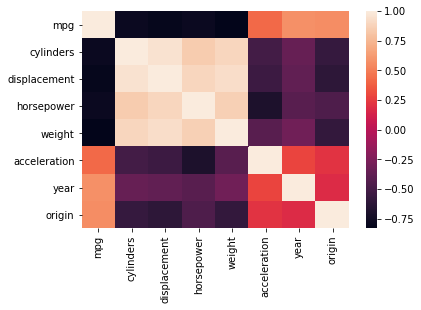

In [21]:
sns.heatmap(auto.corr())

In [25]:
# 9.(c) Use the lm() function to perform a multiple linear regression with mpg as the response and 
# all other variables except name as the predictors. Use the summary() function to print the results. 
# Comment on the output.

predictors = '+'.join(auto.columns.difference(['name', 'mpg']))
auto_mlr = smf.ols('mpg ~ {}'.format(predictors), data = auto).fit()

print(auto_mlr.summary())

print(f"\nResidual Standard Error: {np.sqrt(auto_mlr.mse_resid)}")

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 27 Oct 2020   Prob (F-statistic):          2.04e-139
Time:                        10:22:14   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

In [27]:
# i. Is there a relationship between the predictors and the response?

# Yes, there is a relatioship between the predictors and the response by testing the null hypothesis of 
# whether all the regression coefficients are zero. The F -statistic is far from 1 (with a small p-value), 
# indicating evidence against the null hypothesis.

In [28]:
# ii. Which predictors appear to have a statistically significant relationship to the response?

# Looking at the p-values associated with each predictor’s t-statistic, we see that displacement, 
# weight, year, and origin have a statistically significant relationship, while cylinders, horsepower, 
# and acceleration do not.

In [29]:
# iii. What does the coefficient for the year variable suggest?

# The regression coefficient for year, 0.7508, suggests that for every one year, mpg increases by the coefficient.
# In other words, cars become more fuel efficient every year by almost 1 mpg / year.

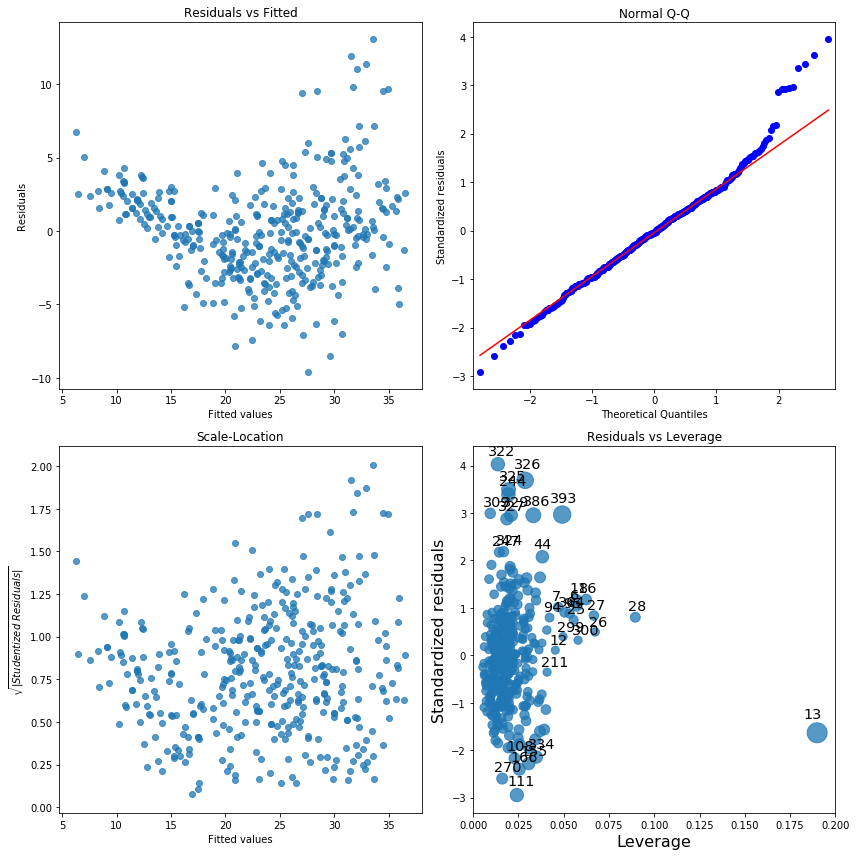

In [30]:
# d) Use the plot() function to produce diagnostic plots of the linear regression fit. 
# Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers?


# Diagnostic plots
infl = auto_mlr.get_influence()
fig, ax = plt.subplots(2, 2, figsize=(12,12))

# 1. Residuals. vs. fitted values
ax1 = plt.subplot(221)
plt.scatter(auto_mlr.fittedvalues, auto_mlr.resid, alpha=0.75)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# 2. Normal Q-Q plot
ax2 = plt.subplot(222)
smg.qqplot(infl.resid_studentized_internal, line='q', ax=ax2)
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized residuals')

# 3. Square-root absolute standardized residuals vs. fitted values
ax3 = plt.subplot(223)
plt.scatter(auto_mlr.fittedvalues, np.sqrt(np.absolute(infl.resid_studentized_external)), alpha=0.75)
plt.title('Scale-Location')
plt.xlabel('Fitted values')
plt.ylabel(r'$\sqrt{|Studentized\ Residuals|}$')

# 4. Standardized residuals vs. leverage statistics
ax4 = plt.subplot(224)
smg.influence_plot(auto_mlr, size=20, ax=ax4)
plt.xlim(0, 0.2)
plt.xlabel('Leverage')
plt.ylabel('Standardized residuals')
plt.title('Residuals vs Leverage')

plt.tight_layout()
plt.show()


In [31]:
# There are some possible outliers; for instance in the residuals vs leverage plot, point 13 seems to have a high
# leverage although not a high residual.

In [33]:
# (e) Use the * and : symbols to fit linear regression models with interaction effects. 
# Do any interactions appear to be statistically significant?

predictors = '+'.join(auto.columns.difference(['name', 'mpg']))
auto_mlr = smf.ols('mpg ~ {} + horsepower*cylinders + horsepower*year'.format(predictors), data=auto).fit()

print(auto_mlr.summary())

print(f"\n Residual Standard Error: {np.sqrt(auto_mlr.mse_resid)}")

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     283.1
Date:                Tue, 27 Oct 2020   Prob (F-statistic):          5.43e-163
Time:                        10:48:34   Log-Likelihood:                -961.89
No. Observations:                 392   AIC:                             1944.
Df Residuals:                     382   BIC:                             1983.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -40.8773 

In [34]:
# we have added two tersms, horsepower*cyllinder and horsepower*year, for both of these the p values are significant
# Adding the interaction terms has resulted in the increase of R2 value from 82.1 to 87.0

In [2]:
carseats_data = pd.read_csv('/home/abhishek/Desktop/ISLR-Applied-Exercises-in-Python/data/Carseats.csv')
print(carseats_data.shape)

carseats_data.head()

(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
carseats_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [4]:
shelveloc_mapping = {'Bad':0,  'Good':1, 'Medium':2}
yes_no_mapping = {'Yes':1, 'No':0}

In [5]:
carseats_data['ShelveLoc'] = carseats_data['ShelveLoc'].map(shelveloc_mapping)

In [6]:
carseats_data['Urban'] = carseats_data['Urban'].map(yes_no_mapping)
carseats_data['US'] = carseats_data['US'].map(yes_no_mapping)

In [7]:
carseats_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [8]:
carseats_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int64
Age              int64
Education        int64
Urban            int64
US               int64
dtype: object

In [9]:
#  (a) Fit a multiple regression model to predict Sales using Price, Urban, and US.

carseats_mlr = smf.ols('Sales ~ Price + Urban + US', data = carseats_data).fit()
print(carseats_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           2.39e-23
Time:                        10:36:51   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

In [10]:
### (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables 
# in the model are qualitative!


# from the coeffiecents we can see that  the Price and Urban are negatively related to Sales, and US is positively related
# Looking at the p values, Price and Us have significant p-values, but Urban has a very high p values ,and its 
# better that we exclude it from the model

In [11]:
# (c) Write out the model in equation form, being careful to handle the qualitative variables properly.

# Sales = 13.0435 - 0.545*Price - 0.0219*Urban + 1.2006*US

# in the above equation, Urban takes values (0,1) and so does US

In [12]:
### (d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?

# although all the predictors are having coefficients non zero, but since Urban has a high value, we will not 
# use it as a predictor

In [13]:
### (e) On the basis of your response to the previous question, fit a smaller model that only uses 
# the predictors for which there is evidence of association with the outcome.

carseats_mlr = smf.ols('Sales ~ Price + US',data = carseats_data).fit()
print(carseats_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           2.66e-24
Time:                        10:36:53   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

In [14]:
# (f) How well do the models in (a) and (e) fit the data?

# Removing the Urban from the first model, there is no change in the R2 value in the second model. T
# hrough this we can also conclude that Urban has no say in the prediction of the response, 
# hence its better to use the model with two predictors

In [15]:
# (g) Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

# for 95% of confidence value we calculate the range of x +/- 2*stddev(x)

coeff_price = -0.0545
std_price = 0.005
range_price = [coeff_price - 2*std_price, coeff_price + 2*std_price]

coeff_US = 1.1996
std_US = 0.258
range_US = [coeff_US - 2*std_US, coeff_US + 2*std_US]

print('With 95% confidence the range for Price coefficient is ',range_price)
print('With 95% confidence the range for US coefficent is ',range_US)

With 95% confidence the range for Price coefficient is  [-0.0645, -0.0445]
With 95% confidence the range for US coefficent is  [0.6836, 1.7156]


Text(0.5, 1.0, 'Residual plot')

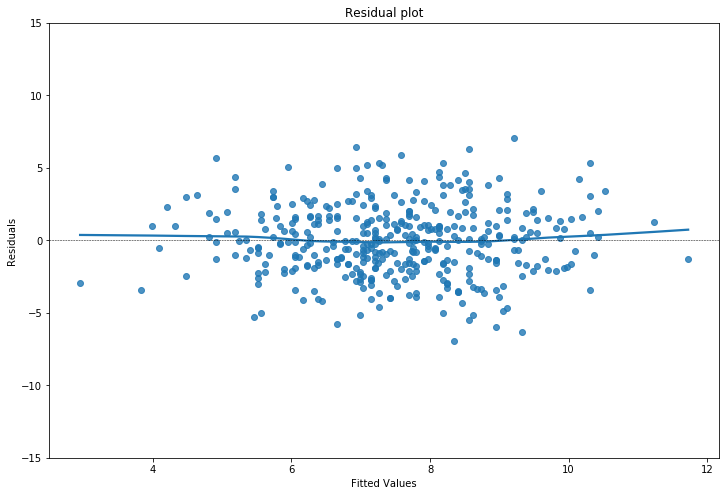

In [18]:
# (h) Is there evidence of outliers or high leverage observations in the model from (e)?

# dist of residuals
plt.figure(figsize = (12, 8))
plt.ylim(-15, 15)

sns.regplot(carseats_mlr.fittedvalues,carseats_mlr.resid, lowess = True)
plt.axhline(y=0, linewidth = 0.5, linestyle = 'dashed', color = 'black')

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.title('Residual plot')

In [19]:
#from the graph, we can see its a good fit, and there is no pattern

In [20]:
# 11. In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple 
# linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

In [21]:
np.random.seed(1)

X = np.random.normal(size = 100)
Y = 2*X + np.random.normal(size = 100)

In [22]:
data = pd.DataFrame({'X':X, 'y':Y})

In [23]:
data.head()

,X,y
0,1.624345,2.801562
1,-0.611756,0.000995
2,-0.528172,-0.652852
3,-1.072969,-1.552359
4,0.865408,0.635903


In [26]:
# (a) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient 
# estimate βˆ, the standard error of this coefficient estimate, and the t-statistic and p-value associated 
# with the null hypothesis H0 : β = 0.

lin_reg = smf.ols('y ~ X + 0', data=data).fit()
print(lin_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Fri, 30 Oct 2020   Prob (F-statistic):                    3.46e-36
Time:                        10:49:19   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [27]:
# coefficient estimate is 2.1067, std_error is 0.106,value of t-statistic is 19.792. P value is significant.
# Hence, we reject null hypothesis, and there is a realationship between predictor and response.

In [28]:
# (b) Now perform a simple linear regression of x onto y without an intercept, and report the 
# coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated 
# with the null hypothesis H0 : β = 0.

lin_reg = smf.ols('X~y + 0', data=data).fit()
print(lin_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                      X   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Fri, 30 Oct 2020   Prob (F-statistic):                    3.46e-36
Time:                        10:51:04   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
# Coef estimate is 0.3789, std_error is 0.019, value of t statistic is 19.792, and p value is significant.

In [31]:
# (c) What is the relationship between the results obtained in (a) and (b)?

# Altough the coeff estimates and their std_errors were different, the value of t - statistic was same in 
# both the cases

<p>
    <img src = "1.png">
</p>

In [33]:
#  (e) Using the results from (d), argue that the t-statistic for the regression of y onto x is the same 
# as the t-statistic for the regression of x onto y.
 
# The formula of t - statistic is symmetric for x and y, therefore if we interchange the values of x and y 
# we will get the same value of t - statistic

In [34]:
### (f) In R, show that when regression is performed with an intercept, the t-statistic for H0 : β1 = 0 is 
# the same for the regression of y onto x as it is for the regression of x onto y.

result = smf.ols('y~X',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           5.39e-36
Time:                        11:03:34   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1470      0.094      1.564      0.1

In [35]:
result = smf.ols('X~y',data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           5.39e-36
Time:                        11:03:39   Log-Likelihood:                -49.289
No. Observations:                 100   AIC:                             102.6
Df Residuals:                      98   BIC:                             107.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0440      0.040     -1.090      0.2

In [36]:
# t value is same  =19.783

In [37]:
## 12. This problem involves simple linear regression without an intercept

In [38]:
### (a) Recall that the coefficient estimate βˆ for the linear regression of Y onto X without an intercept 
# is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y 
# the same as the coefficient estimate for the regression of Y onto X?

# When the sum of the squares of the observed y-values are equal to the sum of the squares of the observed x-values.

In [41]:
### (b) Generate an example in R with n = 100 observations in which the coefficient estimate for the r
# egression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

np.random.seed(0)

X = np.random.normal(size = 100)
Y = 2*X + np.random.normal(size = 100)
data = pd.DataFrame({'X':X, 'y':Y})

In [42]:
lin_xy = LinearRegression(fit_intercept=False).fit(data['X'].to_frame(), data['y'])

coeff_1 = lin_xy.coef_

In [44]:
data['X'].to_frame()

,X
0,1.764052
1,0.400157
2,0.978738
3,2.240893
4,1.867558
...,...
95,0.706573
96,0.010500
97,1.785870
98,0.126912


In [45]:
lin_yx = LinearRegression(fit_intercept=False).fit(data['y'].to_frame(), data['X'])

coeff_2 = lin_yx.coef_

In [47]:
print('coef_1 is {}, coef_2 is {}'.format(coeff_1,coeff_2))

coef_1 is [2.11910764], coef_2 is [0.38298135]


In [48]:
# c) Generate an example in R with n = 100 observations in which the coefficient estimate for the 
# regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X

# we need to choose x and y in such a way that their variable is same. 
X = np.random.normal(size = 100)
y = np.random.permutation(X)
data = pd.DataFrame({'X':X,'y':y})

In [49]:
lin_x_on_y = LinearRegression(fit_intercept=False)
lin_x_on_y.fit(data['X'].to_frame(),data['y'])
coef_1 = lin_x_on_y.coef_

lin_y_on_x = LinearRegression(fit_intercept= False)
lin_y_on_x.fit(data['y'].to_frame(),data['X'])
coef_2 = lin_y_on_x.coef_

print('coef_1 is {}, coef_2 is {}'.format(coef_1,coef_2))

coef_1 is [-0.15473722], coef_2 is [-0.15473722]
